## いろんな描画

描画の方法を忘れがちなので、描画まとめノートブックを作ります。

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

fpath = '/tmp/nikkei_stock_average_daily_jp.csv'

df = pd.read_csv(fpath, 
                 encoding="shift-jis", 
                 index_col="データ日付",
                 )
df = df.iloc[:-1] 
df = df.rename(columns={'終値':'close','始値':'open','高値':'high', '安値':'low'})
df.index = pd.to_datetime(df.index)

df.tail()

,close,open,high,low
データ日付,,,,
2018-12-14,21374.83,21638.96,21751.31,21353.94
2018-12-17,21506.88,21391.73,21563.27,21363.67
2018-12-18,21115.45,21275.51,21330.36,21101.44
2018-12-19,20987.92,21107.17,21168.62,20880.73
2018-12-20,20392.58,20779.93,20841.34,20282.93


## ローソク足

次にローソク足をプロットしてみます。

ローソク足のプロット関数はいくつかあるみたいですが、ここでは `mpl_finance.candlestick_ochl` を使います。

#### mpl_financeのインストール
```
$ pip install mpl_finance 
``` 

#### candlestick_ochl

```
candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    ax : ax 
    quotes : (time, open, close, high, low)で並んだ配列。時間はfloatでなくては行けない。
```


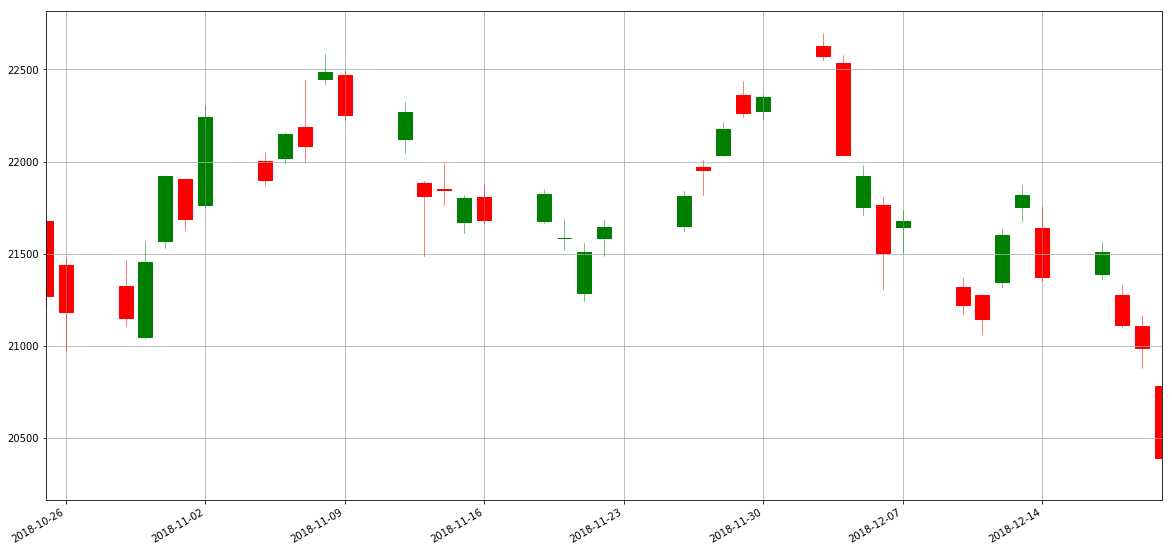

In [66]:
## ローソク足
from matplotlib.dates import date2num
from mpl_finance import candlestick_ochl

fig, ax = plt.subplots(1,1, figsize=(20,10))

#表示が見やすいように最後の40日だけ取得
df_1 = df.iloc[-40:].copy()
df_1['date'] = date2num(df_1.index )

#OCHL でデータを並ばせる. 
df_1 = df_1[['date', 'open', 'close',  'high', 'low']]

ochl = df_1.values
candlestick_ochl(ax, ochl, width=0.7, colorup='g', colordown='r')
ax.set_xlim(df_1.index[0].date(), df_1.index[-1].date())  # x軸の範囲
ax.grid()  # グリッド表示
fig.autofmt_xdate() 